# House Pricing Analysis

You are a Data Analyst working at a Real Estate Investment Trust. <br>
The Trust would like to start investing in Residential real estate. <br>
You are tasked with determining the market price of a house given a set of features. <br>
You will analyze and predict housing prices using attributes or features such as square footage, number of bedrooms, number of floors, and so on.

Dataset Used in this Assignment

The dataset contains house sale prices for King County, USA, which includes Seattle. <br>
It includes homes sold between May 2014 and May 2015. <br>
It was taken from: https://www.kaggle.com/datasets/harlfoxem/housesalesprediction <br>
It was also slightly modified for this analysis and it is available on:
https://raw.githubusercontent.com/ElsonFilho/Python_DataAnalysis/main/notebooks/housing.csv


| Variable      | Description                                                                                                 |
| ------------- | ----------------------------------------------------------------------------------------------------------- |
| id            | A notation for a house                                                                                      |
| date          | Date house was sold                                                                                         |
| price         | Price is prediction target                                                                                  |
| bedrooms      | Number of bedrooms                                                                                          |
| bathrooms     | Number of bathrooms                                                                                         |
| sqft_living   | Square footage of the home                                                                                  |
| sqft_lot      | Square footage of the lot                                                                                   |
| floors        | Total floors (levels) in house                                                                              |
| waterfront    | House which has a view to a waterfront                                                                      |
| view          | Has been viewed                                                                                             |
| condition     | How good the condition is overall                                                                           |
| grade         | overall grade given to the housing unit, based on King County grading system                                |
| sqft_above    | Square footage of house apart from basement                                                                 |
| sqft_basement | Square footage of the basement                                                                              |
| yr_built      | Built Year                                                                                                  |
| yr_renovated  | Year when house was renovated                                                                               |
| zipcode       | Zip code                                                                                                    |
| lat           | Latitude coordinate                                                                                         |
| long          | Longitude coordinate                                                                                        |
| sqft_living15 | Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area |
| sqft_lot15    | LotSize area in 2015(implies-- some renovations)                                                            |

**Import the required libraries**

In [4]:
!pip install -U scikit-learn

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

##**Load the Dataset**

In [6]:
url = 'https://raw.githubusercontent.com/ElsonFilho/Python_DataAnalysis/main/notebooks/housing.csv'

try:
    df = pd.read_csv(url)
    # Identify columns that might be 'unnamed'
    unnamed_cols = [col for col in df.columns if 'Unnamed' in col]
    # Remove these columns
    df = df.drop(columns=unnamed_cols, errors='ignore')
    print("Dataset successfully downloaded, loaded, and 'Unnamed' columns (if any) removed.")
    print(df.head())
except Exception as e:
    print(f"An error occurred while downloading or reading the CSV file: {e}")

Dataset successfully downloaded, loaded, and 'Unnamed' columns (if any) removed.
           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0       3.0       1.00         1180   
1  6414100192  20141209T000000  538000.0       3.0       2.25         2570   
2  5631500400  20150225T000000  180000.0       2.0       1.00          770   
3  2487200875  20141209T000000  604000.0       4.0       3.00         1960   
4  1954400510  20150218T000000  510000.0       3.0       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8 

In [7]:
# Display the data types of each column using the function dtypes.

print("\nData types of each column:")
print(df.dtypes)


Data types of each column:
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


In [8]:
# Use the method describe to obtain a statistical summary of the dataframe.

df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## Data Wrangling

In [9]:
# Drop the columns "id" and "Unnamed: 0" from axis 1 using the method drop()
# then use the method describe() to obtain a statistical summary of the data.

# Drop the specified columns in place
df.drop(columns=["id", "Unnamed: 0"], axis=1, inplace=True, errors='ignore')

# Display the statistical summary of the data
print("Statistical summary of the data:")
print(df.describe())

Statistical summary of the data:
              price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.161300e+04  21600.000000  21603.000000  21613.000000  2.161300e+04   
mean   5.400881e+05      3.372870      2.115736   2079.899736  1.510697e+04   
std    3.671272e+05      0.926657      0.768996    918.440897  4.142051e+04   
min    7.500000e+04      1.000000      0.500000    290.000000  5.200000e+02   
25%    3.219500e+05      3.000000      1.750000   1427.000000  5.040000e+03   
50%    4.500000e+05      3.000000      2.250000   1910.000000  7.618000e+03   
75%    6.450000e+05      4.000000      2.500000   2550.000000  1.068800e+04   
max    7.700000e+06     33.000000      8.000000  13540.000000  1.651359e+06   

             floors    waterfront          view     condition         grade  \
count  21613.000000  21613.000000  21613.000000  21613.000000  21613.000000   
mean       1.494309      0.007542      0.234303      3.409430      7.656873   
std        0.53998

In [10]:
# Check for missing values in each column
missing_values = df.isnull().sum()

# Filter to show only columns with missing values
missing_values = missing_values[missing_values > 0]

if not missing_values.empty:
    print("Variables with missing data:")
    print(missing_values)
else:
    print("No variables with missing data found.")

Variables with missing data:
bedrooms     13
bathrooms    10
dtype: int64


In [11]:
# We can replace the missing values using the means.

# Calculate the mean of 'bedrooms'
mean_bedrooms = df['bedrooms'].mean()

# Replace missing values in 'bedrooms' with its mean
df.loc[:, 'bedrooms'] = df['bedrooms'].fillna(mean_bedrooms)

# Calculate the mean of 'bathrooms'
mean_bathrooms = df['bathrooms'].mean()

# Replace missing values in 'bathrooms' with its mean
df.loc[:, 'bathrooms'] = df['bathrooms'].fillna(mean_bathrooms)

# Verify that the missing values have been replaced
print("Missing values after replacement:")
print(df[['bedrooms', 'bathrooms']].isnull().sum())

Missing values after replacement:
bedrooms     0
bathrooms    0
dtype: int64


## Exploratory Data Analysis

In [12]:
# Count the occurrences of each unique value in the 'floors' column
floors_counts = df['floors'].value_counts()

# Convert the resulting Series to a DataFrame
floors_df = floors_counts.to_frame(name='count')

# Display the DataFrame
print("Number of houses with unique floor values:")
print(floors_df)

Number of houses with unique floor values:
        count
floors       
1.0     10680
2.0      8241
1.5      1910
3.0       613
2.5       161
3.5         8


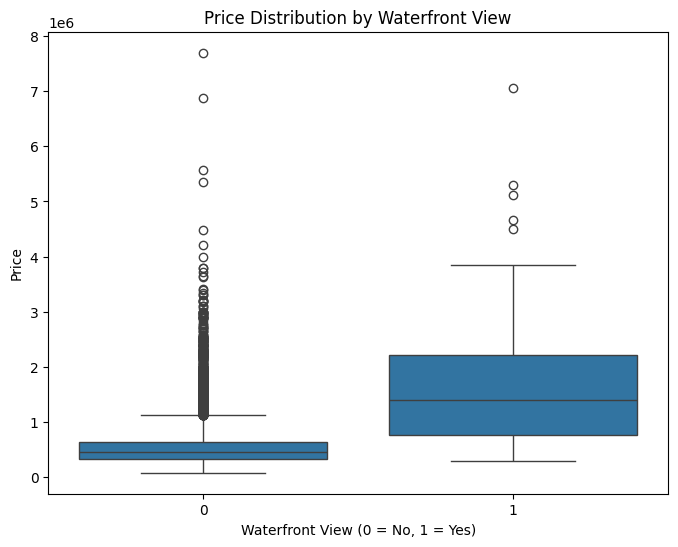

In [13]:
# Create a boxplot of 'price' grouped by 'waterfront'
plt.figure(figsize=(8, 6))
sns.boxplot(x='waterfront', y='price', data=df)
plt.title('Price Distribution by Waterfront View')
plt.xlabel('Waterfront View (0 = No, 1 = Yes)')
plt.ylabel('Price')
plt.show()

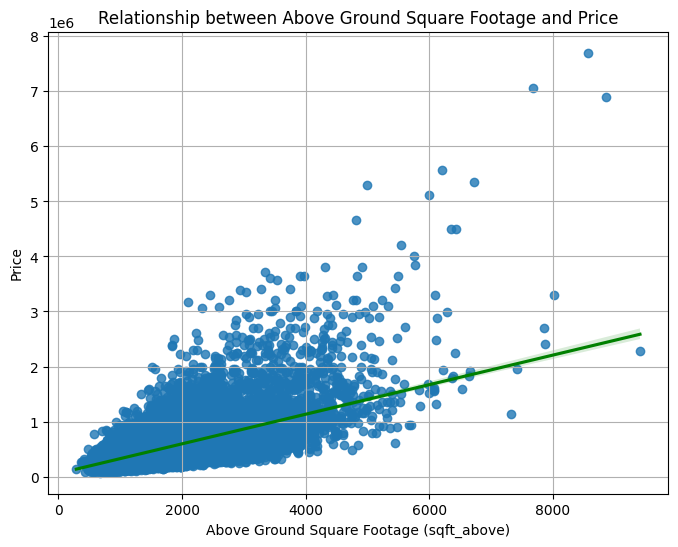

In [14]:
# Create a regression plot of 'sqft_above' vs 'price'

plt.figure(figsize=(8, 6))
sns.regplot(x='sqft_above', y='price', data=df, line_kws={'color': 'green'})
plt.title('Relationship between Above Ground Square Footage and Price')
plt.xlabel('Above Ground Square Footage (sqft_above)')
plt.ylabel('Price')
plt.grid(True)
plt.show()

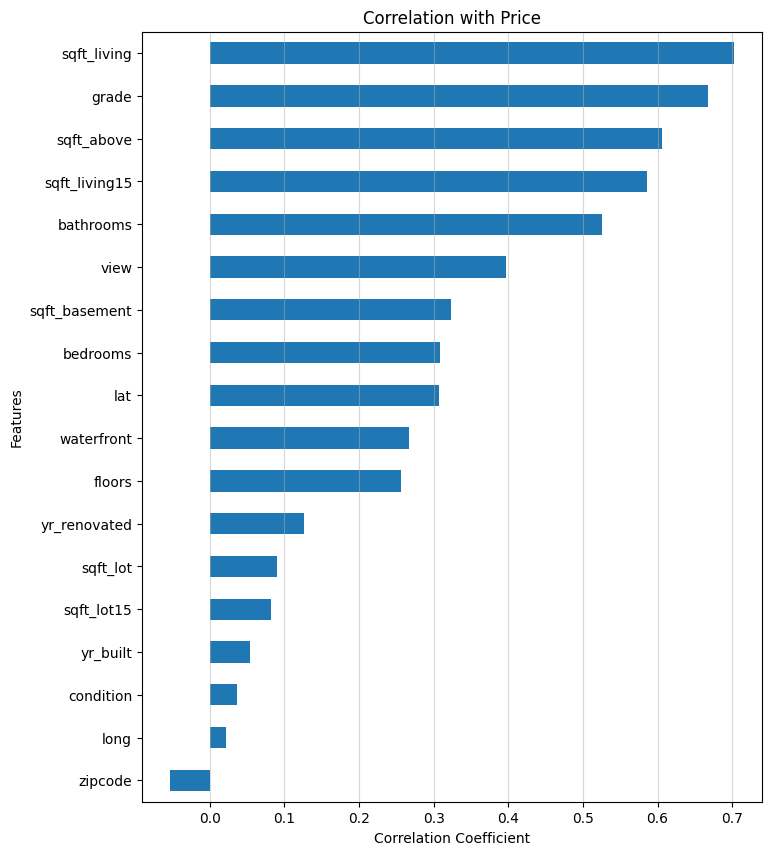

In [15]:
# Check correlations

df_numeric = df.select_dtypes(include=[np.number])
correlations = df_numeric.corr()['price'].sort_values()


# Create a bar chart to visualize the correlations
plt.figure(figsize=(8, 10))  # Adjust figure size for better readability
correlations.drop('price').plot(kind='barh')  # Exclude 'price' from the plot
plt.title('Correlation with Price')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.grid(axis='x', alpha=0.5)  # Add a subtle grid
plt.show()

## Model Development

In [16]:
# Fit a linear regression model to predict the 'price' using a list of features:

features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]

# Select the features (independent variables) and the target (dependent variable)
X = df[features]
y = df['price']

# Create a linear regression model
lm = LinearRegression()

# Fit the model
lm.fit(X, y)

# Make predictions
y_pred = lm.predict(X)

# Calculate the R-squared score
r_squared = lm.score(X, y)

print(f"R-squared value with multiple features: {r_squared:.4f}")

R-squared value with multiple features: 0.6577


In [17]:
# Create the pipeline object
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]
pipeline = Pipeline(Input)

# Select the features (independent variables) and the target (dependent variable)
X = df[features]
y = df['price']

# Fit the pipeline to the entire dataset
pipeline.fit(X, y)

# Make predictions on the same dataset
y_pred = pipeline.predict(X)

# Calculate the R-squared score
r_squared = pipeline.score(X, y)

print(f"R-squared value using the pipeline: {r_squared:.4f}")

R-squared value using the pipeline: 0.7513


## Model Evaluation and Refinement

In [23]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
print("done")

done


We will split the data into training and testing sets

In [24]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]
X = df[features]
Y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)


print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 3242
number of training samples: 18371


In [25]:
# Create a Linear Regression model
lr = LinearRegression()  # Instantiate the LinearRegression model

# Perform cross-validation (e.g., 4 folds)
cv_scores = cross_val_score(lr, x_train, y_train, cv=4, scoring='r2') # Changed cv=3 to cv=4 and added scoring='r2'

# Print the R-squared scores for each fold
print("R-squared scores for each fold:", cv_scores)

# Print the mean R-squared score
print("Mean R-squared score:", np.mean(cv_scores))

R-squared scores for each fold: [0.65789608 0.66187069 0.65596661 0.65523481]
Mean R-squared score: 0.6577420485920288


In [30]:
# Fit the model on the training data
lr.fit(x_train, y_train)

# Predict on the test data
y_pred_test = lr.predict(x_test)

# Calculate the R-squared score on the test set
r2_test = r2_score(y_test, y_pred_test)

# Print the R-squared score for the test set
print("R-squared score on the test set:", r2_test)

R-squared score on the test set: 0.6478834184390263
